# İmportlar

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [ ]:
# Son 3 ay günlük verisi
btc_data = yf.download('BTC-USD', period='3mo', interval='1d')

[*********************100%***********************]  1 of 1 completed


## # Veriyi görselleştirelim

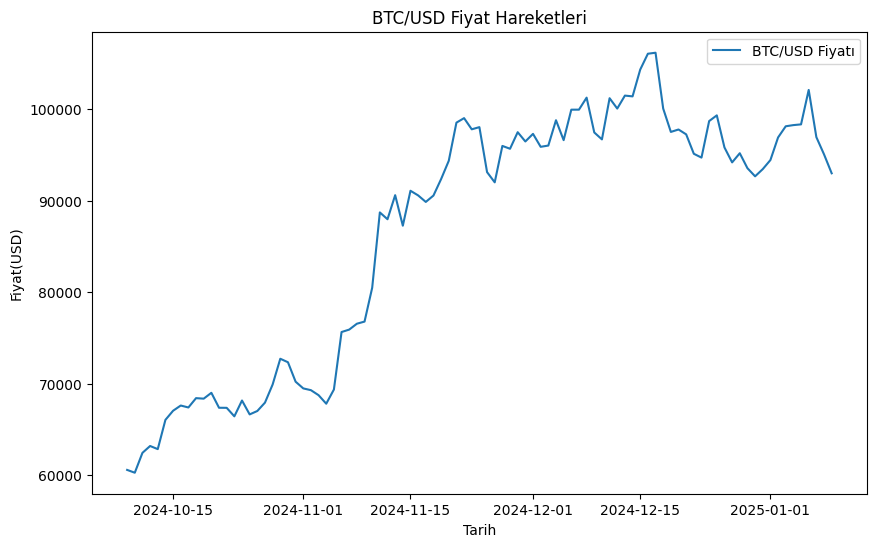

In [ ]:

plt.figure(figsize=(10,6))
plt.plot(btc_data['Close'], label='BTC/USD Fiyatı')
plt.title('BTC/USD Fiyat Hareketleri')
plt.xlabel('Tarih')
plt.ylabel('Fiyat(USD)')
plt.legend()
plt.show()

## Veri İncelemesi ve Temizliği:


In [ ]:
# Veride eksik değerler var mı kontrol edelim
print(btc_data.isnull().sum())

# Eksik değerleri kaldırma
btc_data = btc_data.dropna()

# Verinin temel istatistiksel analizini yapalım
print(btc_data.describe())


Price   Ticker 
Close   BTC-USD    0
High    BTC-USD    0
Low     BTC-USD    0
Open    BTC-USD    0
Volume  BTC-USD    0
dtype: int64
Price           Close           High            Low           Open  \
Ticker        BTC-USD        BTC-USD        BTC-USD        BTC-USD   
count       93.000000      93.000000      93.000000      93.000000   
mean     86609.104461   88113.172967   84717.790281   86285.165071   
std      13962.121613   14406.060816   13675.281928   14175.109640   
min      60274.500000   61236.722656   58895.207031   60275.460938   
25%      69482.468750   70522.789062   68779.703125   69358.500000   
50%      93429.203125   95174.875000   91914.031250   93425.101562   
75%      97490.953125   99014.218750   95587.679688   97484.695312   
max     106140.601562  108268.445312  105291.734375  106147.296875   

Price         Volume  
Ticker       BTC-USD  
count   9.300000e+01  
mean    5.640552e+10  
std     2.920347e+10  
min     1.444350e+10  
25%     3.561139e+10  
50% 

In [ ]:
len(btc_data)

0

## MA ile görşelleştirme

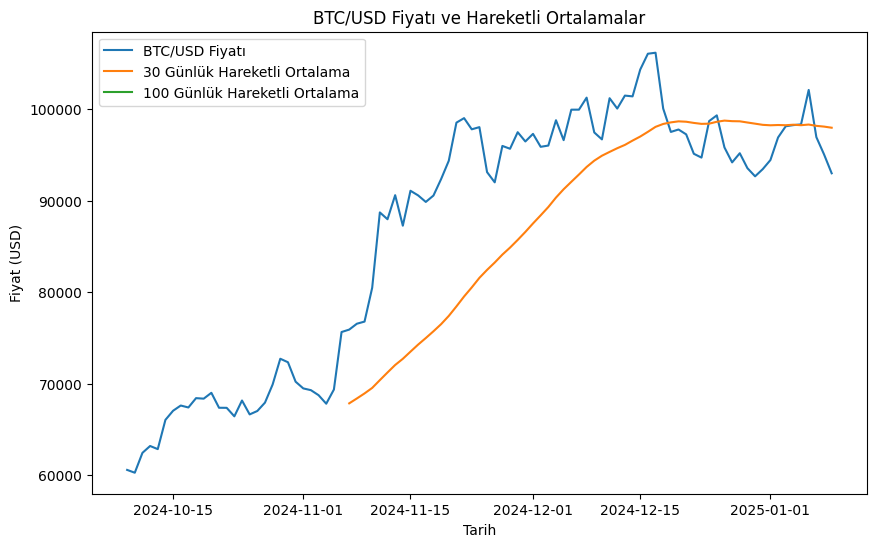

In [ ]:
# 30 günlük hareketli ortalamayı hesapla
btc_data['30_Day_MA'] = btc_data['Close'].rolling(window=30).mean()

# 100 günlük hareketli ortalamayı hesapla
btc_data['100_Day_MA'] = btc_data['Close'].rolling(window=100).mean()

# Grafiği görselleştir
plt.figure(figsize=(10,6))
plt.plot(btc_data['Close'], label='BTC/USD Fiyatı')
plt.plot(btc_data['30_Day_MA'], label='30 Günlük Hareketli Ortalama')
plt.plot(btc_data['100_Day_MA'], label='100 Günlük Hareketli Ortalama')
plt.title('BTC/USD Fiyatı ve Hareketli Ortalamalar')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (USD)')
plt.legend()
plt.show()


# Makine Öğrenmesi 1

##  Makine Öğrenimi ile Fiyat Tahmini (Regresyon Modeli)

In [ ]:
len(btc_data)

93

In [ ]:
# Özellikler (X) ve hedef (y) verisini oluşturuyoruz
# Burada, geçmiş 30 günün kapanış fiyatlarını kullanacağız

btc_data['Target'] = btc_data['Close'].shift(-1)  # Bir sonraki günün kapanış fiyatı hedef

# Kullanılacak özellikler: Son 30 günün kapanış fiyatı
features = [f'Close_{i}' for i in range(1, 31)]

# Özellikleri ve hedefi oluşturuyoruz
for i in range(1, 31):
    btc_data[f'Close_{i}'] = btc_data['Close'].shift(i)

# Veri setini temizliyoruz (ilk 30 gün kullanılmaz çünkü eksik veriler var)
btc_data = btc_data.dropna()

# Bağımsız değişkenler (X) ve bağımlı değişken (y)
X = btc_data[features]
y = btc_data['Target']

# Eğitim ve test verilerine ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Modeli oluşturuyoruz ve eğitiyoruz
model = LinearRegression()
model.fit(X_train, y_train)

# Tahmin yapıyoruz
y_pred = model.predict(X_test)

# Modelin başarısını değerlendirelim
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 4110.588378796625


## Modeli Görselleştirme

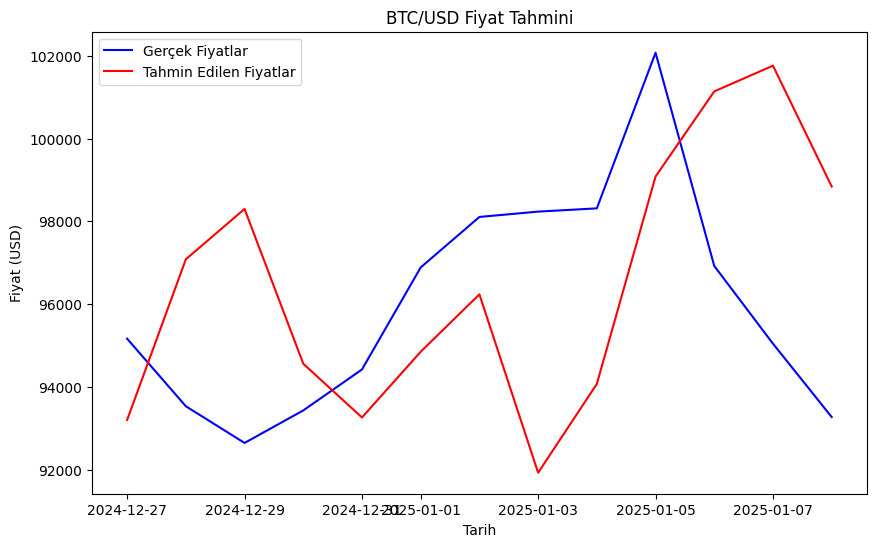

In [ ]:
# Gerçek ve tahmin edilen değerleri görselleştirelim
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label='Gerçek Fiyatlar', color='blue')
plt.plot(y_test.index, y_pred, label='Tahmin Edilen Fiyatlar', color='red')
plt.title('BTC/USD Fiyat Tahmini')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (USD)')
plt.legend()
plt.show()


# Makine Öğrenmesi 2

## Günümüze kadar veri çekme

In [ ]:
# BTC/USD verisini Yahoo Finance'tan çekiyoruz
btc_data = yf.download('BTC-USD', start='2017-01-01')
# Veriyi kaydedelim (isteğe bağlı)
btc_data.to_csv('btc_data_2017_2025.csv')

[*********************100%***********************]  1 of 1 completed


In [ ]:
btc_data

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2017-01-01,998.325012,1003.080017,958.698975,963.658020,147775008
2017-01-02,1021.750000,1031.390015,996.702026,998.617004,222184992
2017-01-03,1043.839966,1044.079956,1021.599976,1021.599976,185168000
2017-01-04,1154.729980,1159.420044,1044.400024,1044.400024,344945984
2017-01-05,1013.380005,1191.099976,910.416992,1156.729980,510199008
...,...,...,...,...,...
2025-01-05,98314.960938,98813.304688,97291.765625,98233.906250,20525254825
2025-01-06,102078.085938,102482.875000,97926.148438,98314.953125,51823432705


##  Veriyi Hazırlama

In [ ]:
# Özellik mühendisliği ekliyoruz
btc_data['50_Day_MA'] = btc_data['Close'].rolling(window=50).mean()
btc_data['200_Day_MA'] = btc_data['Close'].rolling(window=200).mean()
btc_data['Daily_Change'] = btc_data['Close'].pct_change()

# Veriyi temizleyelim (NaN değerler)
btc_data = btc_data.dropna()

# Özellikler (X) ve hedef (y) verilerini oluşturuyoruz
features = [f'Close_{i}' for i in range(1, 31)] + ['50_Day_MA', '200_Day_MA', 'Daily_Change']

# Geçmiş 30 günün verilerini oluşturuyoruz
for i in range(1, 31):
    btc_data[f'Close_{i}'] = btc_data['Close'].shift(i)

# Hedef değişken (target) olarak bir sonraki günün kapanış fiyatını kullanıyoruz
btc_data['Target'] = btc_data['Close'].shift(-1)

# Veri setini temizliyoruz (ilk 30 gün için eksik veriler olabilir)
btc_data = btc_data.dropna()

# Özellikler (X) ve hedef (y)
X = btc_data[features]
y = btc_data['Target']

# Eğitim ve test verilerine ayıralım
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Modeli oluşturuyoruz ve eğitiyoruz
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Tahmin yapıyoruz
y_pred = model.predict(X_test)

# Modelin başarısını değerlendirelim
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print(f"Root Mean Squared Error (RMSE): {rmse}")


## Görselleştirme

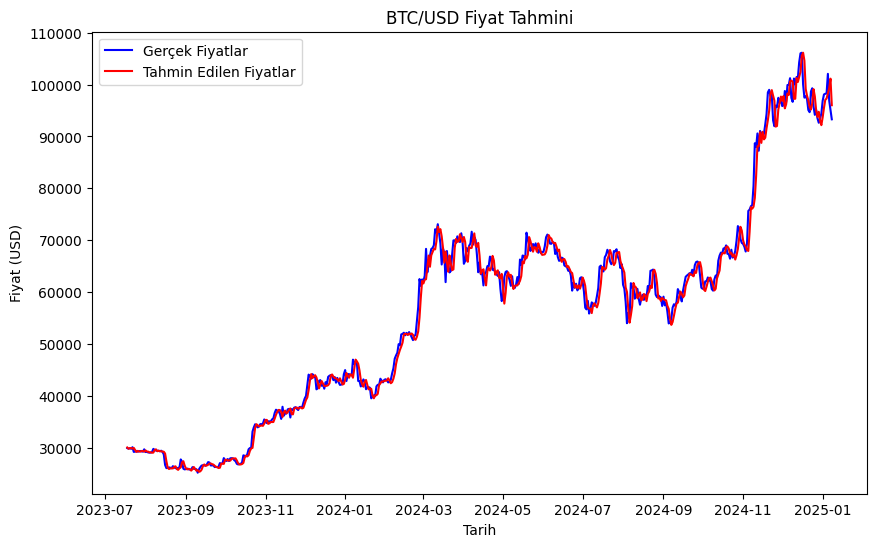

In [ ]:
# Gerçek ve tahmin edilen fiyatları görselleştirelim
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test, label='Gerçek Fiyatlar', color='blue')
plt.plot(y_test.index, y_pred, label='Tahmin Edilen Fiyatlar', color='red')
plt.title('BTC/USD Fiyat Tahmini')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (USD)')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score

# R² skoru
r2 = r2_score(y_test, y_pred)
print(f"R² Skoru: {r2}")

# MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")


R² Skoru: 0.991105302452809
Mean Absolute Error (MAE): 1308.3161585325095


# Makine Öğrenmesi 3

## Ridge ve Lasso Regresyon

In [ ]:
from sklearn.linear_model import Ridge, Lasso

# Ridge modelini deneyelim
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

# Lasso modelini deneyelim
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

# Performansı karşılaştırma
print(f"Ridge Model RMSE: {mean_squared_error(y_test, ridge_pred) ** 0.5}")
print(f"Lasso Model RMSE: {mean_squared_error(y_test, lasso_pred) ** 0.5}")


Ridge Model RMSE: 2000.7020293562778
Lasso Model RMSE: 1945.1524304373854


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.317e+09, tolerance: 5.592e+07
  model = cd_fast.enet_coordinate_descent(


## Random Forest Regressor



In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest modelini deneyelim
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Performansı değerlendirelim
print(f"Random Forest RMSE: {mean_squared_error(y_test, rf_pred) ** 0.5}")


Random Forest RMSE: 11355.50354082964


## Zaman Serisi ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# ARIMA modelini oluşturalım
model = ARIMA(btc_data['Close'], order=(5, 1, 0))  # p, d, q değerlerini ayarlayabilirsiniz
arima_model = model.fit()

# Tahmin yapalım
arima_forecast = arima_model.forecast(steps=30)
print(arima_forecast)


# LSTM




## Veriyi Uygun Formata Getirme

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Kapanış fiyatları ile işlem yapalım
data = btc_data[['Close']].values

# Veriyi normalize edelim (0-1 arasında)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Veriyi X (özellikler) ve y (etiketler) olarak ayıralım
# Burada geçmiş 60 günün bilgisi ile 61. günü tahmin edeceğiz
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i-time_step:i, 0])  # Geçmiş 60 günü alıyoruz
        y.append(data[i, 0])  # 61. günün fiyatını tahmin ediyoruz
    return np.array(X), np.array(y)

# Veriyi hazırlıyoruz
time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Veriyi eğitim ve test setlerine ayıralım
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# LSTM için şekli uygun hale getirelim
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


NameError: name 'btc_data' is not defined

## LSTM Modelini Oluşturma

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# LSTM modelini oluşturalım
model = Sequential()

# İlk LSTM katmanı
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# İkinci LSTM katmanı
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Çıktı katmanı
model.add(Dense(units=1))

# Modeli derliyoruz
model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Modeli Eğitme ve Tahmin Yapma

In [ ]:
# Modeli eğitelim
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Test verisiyle tahmin yapalım
predictions = model.predict(X_test)

# Tahminleri ters çevirelim (scaler ile geri alacağız)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))


Epoch 1/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 7s 49ms/step - loss: 0.0104
Epoch 2/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 0.0011
Epoch 3/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - loss: 8.7850e-04
Epoch 4/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 11s 78ms/step - loss: 9.6157e-04
Epoch 5/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - loss: 7.9896e-04
Epoch 6/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 7.3118e-04
Epoch 7/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 8.2641e-04
Epoch 8/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 7.0534e-04
Epoch 9/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 6.7611e-04
Epoch 10/10
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 5.6710e-04
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step


## Tahminleri Görselleştirme


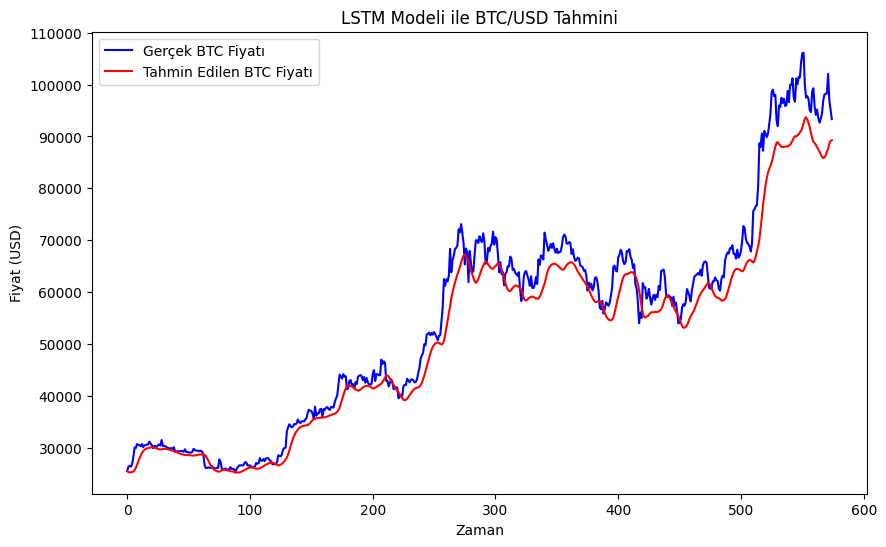

In [ ]:
# Gerçek fiyatlar ve tahmin edilen fiyatları görselleştirelim
plt.figure(figsize=(10,6))
plt.plot(y_test, label='Gerçek BTC Fiyatı', color='blue')
plt.plot(predictions, label='Tahmin Edilen BTC Fiyatı', color='red')
plt.title('LSTM Modeli ile BTC/USD Tahmini')
plt.xlabel('Zaman')
plt.ylabel('Fiyat (USD)')
plt.legend()
plt.show()


# LSTM Gerçek Zamanlı Dakikalık

In [3]:
import requests
import pandas as pd
from datetime import datetime

def get_binance_data(symbol='BTCUSDT', interval='1m', limit=1000):
    url = f'https://api.binance.com/api/v1/klines'
    params = {
        'symbol': symbol,
        'interval': interval,
        'limit': limit
    }
    response = requests.get(url, params=params)
    data = response.json()

    # Veriyi pandas dataframe'ine dönüştürelim
    df = pd.DataFrame(data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])

    # Zaman damgasını dönüştürüp datetime formatına çevirelim
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

    # Sadece ihtiyacımız olan kolonları alalım (timestamp ve close)
    df = df[['timestamp', 'close']]

    # Fiyatları float tipine çevirelim
    df['close'] = df['close'].astype(float)

    return df

# 1 dakikalık BTC/USD verisi alalım
btc_data_minute = get_binance_data(symbol='BTCUSDT', interval='1m', limit=1000)

# Veriyi kontrol edelim
print(btc_data_minute.head())


Empty DataFrame
Columns: [timestamp, close]
Index: []


In [4]:
# Veriyi dakikalık hale getirdiğimizden, verimizi yeniden hazırlayalım
data = btc_data_minute[['close']].values

# Normalize edelim
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Veriyi X ve y olarak ayıralım
X, y = create_dataset(scaled_data, time_step=60)

# Eğitim ve test setlerine ayıralım
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# LSTM için şekli uygun hale getirelim
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


ValueError: Found array with 0 sample(s) (shape=(0, 1)) while a minimum of 1 is required by MinMaxScaler.

In [ ]:
import time

# Geçmiş veriyi tutacak bir liste
historical_data = []

def real_time_prediction(model, scaler):
    global historical_data

    while True:
        # Yeni dakikalık veri alalım
        new_data = get_binance_data(symbol='BTCUSDT', interval='1m', limit=1)
        new_data_value = new_data['close'].iloc[-1]  # Son kapanış fiyatını alıyoruz
        historical_data.append(new_data_value)

        # Eğer 60 dakikalık veri yoksa, bekle
        if len(historical_data) < 15:
            time.sleep(15)
            continue

        # Son 60 dakikalık veriyi alalım ve normalize edelim
        last_15_minutes = historical_data[-15:]
        last_15_minutes_scaled = scaler.transform(np.array(last_15_minutes).reshape(-1, 1))

        # Model tahmini yapalım
        new_prediction = model.predict(last_15_minutes_scaled.reshape(1, 15, 1))  # 60 dakikalık geçmişi kullanarak tahmin
        new_prediction = scaler.inverse_transform(new_prediction)  # Veriyi geri dönüştür

        # Tahmin edilen değeri yazdıralım
        print(f'Tahmin Edilen Değer: {new_prediction[0][0]} USD')

        # Yeni veri geldiğinde eski veriyi çıkaralım
        historical_data = historical_data[-15:]

        # Her dakika bekleyelim
        time.sleep(15)

# Gerçek zamanlı tahmin yapmak için fonksiyonu çalıştırabiliriz
real_time_prediction(model, scaler)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
Tahmin Edilen Değer: 93344.9453125 USD
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Tahmin Edilen Değer: 93354.2421875 USD
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Tahmin Edilen Değer: 93362.84375 USD
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Tahmin Edilen Değer: 93371.9296875 USD
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Tahmin Edilen Değer: 93380.9375 USD
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Tahmin Edilen Değer: 93389.6640625 USD
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Tahmin Edilen Değer: 93399.3125 USD
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Tahmin Edilen Değer: 93408.8984375 USD
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Tahmin Edilen Değer: 93416.9453125 USD
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Tahmin Edilen Değer: 93424.265625 USD
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Tahmin Edilen Değer: 93432.28125 USD
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Tahmin Edilen Değer: 93439.8984375 USD
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Tahmin Edilen Değer: 93446.7734375 USD
1/1 ━━━━━